**2-Wheel and 3-Wheel Contingency Math**

When operating a satellite, a wheel can become unusable over its life cycle. Therefore, it's necessary to formulate a contingency plan in that circumstance. Let's start with the 4-Wheel math.

Here we want to find the axis of rotation of each motor and represent them as column vectors: `ax1`, `ax2`, `ax3`, and `ax4`. These can be understood as the torque direction vectors of individual motors.

Define `tilt_ang` as the angle that the motors are tilted up from the base plate. Note that we do not need to place these axis vectors where the motor rests, as the motor produces a pure torque on the spacecraft body, thus leaving them at the origin makes no difference. They can be moved for clarity of visualization, but it does not affect any calculation.

Let's solve the problem, find the individual torque magnitudes for each motor if these are given:
* The desired torque (single 3x1 vector in body frame, mag. and dir.)
* The torque dir. vectors for the individual motors (four 3x1 vectors in body frame)

A basis matrix can be formed from those column vectors, defining the space that the motor torque axes span. This matrix takes the individual motor torque magnitudes (4x1 vector) as input and transforms it to the desired torque (3x1 vector) as output. If we could invert that matrix, we could obtain the inverse transformation: desired torque to motor magnitudes. Since the matrix is a 3x4, we instead take the psuedo inverse.

This pseudo inverse matrix (4x3 matrix) takes the desired torque (3x1 vector) as input and transforms it to the individual motor torque magnitudes (4x1 vector) as output.

The basis of the individual motors is 
 [[ 0.57738155 -0.57738155 -0.57738155  0.57738155]
 [ 0.57738155  0.57738155 -0.57738155 -0.57738155]
 [-0.57728771 -0.57728771 -0.57728771 -0.57728771]].

The transformation matrix from desired torque in body frame to motor torques is 
 [[ 0.5  0.  -1. ]
 [-0.5  1.   0. ]
 [-0.5 -0.5 -0.5]
 [ 0.5 -0.5 -0.5]].



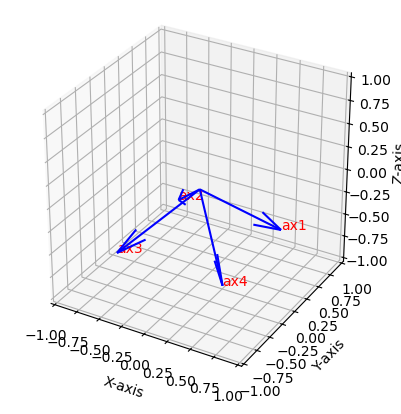

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# pseudo inverse
def pseudo_inverse(matrix):
    inverse = np.matmul(np.linalg.inv(np.matmul(matrix.T,matrix)),matrix.T)
    return inverse

# Tilt angle from base
tilt_ang = np.deg2rad(35.26)

# Individual motor axes, 4-wheel pyramid
ax1 = np.array([np.cos(tilt_ang)/np.sqrt(2), np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax2 = np.array([-np.cos(tilt_ang)/np.sqrt(2), np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax3 = np.array([-np.cos(tilt_ang)/np.sqrt(2), -np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax4 = np.array([np.cos(tilt_ang)/np.sqrt(2), -np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])

# Basis of individual motors, transform from individual motor torques TO desired torque (m2d)
m2d = np.column_stack((ax1, ax2, ax3, ax4))
print(f"The basis of the individual motors is \n {m2d}.\n")

# Calculate the transformation matrix from desired torque vector to motor torque vectors
d2m = pseudo_inverse(m2d)
print(f"The transformation matrix from desired torque in body frame to motor torques is \n {d2m}.\n")

# Simple axis visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the unit-length lines
origin = np.zeros(3)
for col, label in zip(m2d.T, ['ax1', 'ax2', 'ax3', 'ax4']):
    ax.quiver(*origin, *col, length=1.0, normalize=True, color='b', label=label)
# Annotate lines with labels
for col, label in zip(m2d.T, ['ax1', 'ax2', 'ax3', 'ax4']):
    ax.text(col[0], col[1], col[2], label, color='r')
# Set plot limits
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# Set plot labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
# Show the plot
ax.set_box_aspect([1, 1, 1])
plt.show()

Consider the case of one wheel being inoperable. Now we have four different cases, one for each possible rotation axis that can be lost. Thus we need 4 different transformation matrices.

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# normalize transform matrix
def normalize_transform(matrix):
    # Ensure each column is a unit vector
    for i in range(3):
        matrix[:, i] /= np.linalg.norm(matrix[:, i])
    # Ensure columns are orthogonal to each other
    matrix[:, 2] = np.cross(matrix[:, 0], matrix[:, 1])
    matrix[:, 2] /= np.linalg.norm(matrix[:, 2])
    return matrix


# Tilt angle from base
tilt_ang = np.deg2rad(35.26)

# Individual motor axes, 4-wheel
ax1 = np.array([np.cos(tilt_ang)/np.sqrt(2), np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax2 = np.array([-np.cos(tilt_ang)/np.sqrt(2), np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax3 = np.array([-np.cos(tilt_ang)/np.sqrt(2), -np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax4 = np.array([np.cos(tilt_ang)/np.sqrt(2), -np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])

# Four cases of desired torque vector to motor torque vectors as Direction Cosine Matrices
# Case 1: Wheel 1 inoperable
dcm_rm1 = normalize_transform(np.linalg.inv(np.column_stack((ax2,ax3,ax4))))
# Case 2: Wheel 2 inoperable
dcm_rm2 = normalize_transform(np.linalg.inv(np.column_stack((ax1,ax3,ax4))))
# Case 3: Wheel 3 inoperable
dcm_rm3 = normalize_transform(np.linalg.inv(np.column_stack((ax1,ax2,ax4))))
# Case 4: Wheel 4 inoperable
dcm_rm4 = normalize_transform(np.linalg.inv(np.column_stack((ax1,ax2,ax3))))

print(f"The transform matrix of wheel 1 removed is \n {dcm_rm1}.\n")

The transform matrix of wheel 1 removed is 
 [[-0.          0.70710678  0.57735027]
 [-0.70710678 -0.70710678  0.57735027]
 [ 0.70710678 -0.          0.57735027]].



Consider the case of two wheels being inoperable. Now we have six different cases.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# pseudo inverse
def pseudo_inverse(matrix):
    inverse = np.matmul(np.linalg.inv(np.matmul(matrix.T,matrix)),matrix.T)
    return inverse

# Tilt angle from base
tilt_ang = np.deg2rad(35.26)

# Individual motor axes, 4-wheel pyramid
ax1 = np.array([np.cos(tilt_ang)/np.sqrt(2), np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax2 = np.array([-np.cos(tilt_ang)/np.sqrt(2), np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax3 = np.array([-np.cos(tilt_ang)/np.sqrt(2), -np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])
ax4 = np.array([np.cos(tilt_ang)/np.sqrt(2), -np.cos(tilt_ang)/np.sqrt(2), -np.sin(tilt_ang)])

# Four cases of desired torque vector TO motor torque vectors (d2m)
# Case 1: Wheel 1 & 2 inoperable
d2m_rm12 = pseudo_inverse(np.column_stack((ax1,ax2)))
# Case 2: Wheel 1 & 3 inoperable
d2m_rm13 = pseudo_inverse(np.column_stack((ax1,ax3)))
# Case 3: Wheel 1 & 4 inoperable
d2m_rm14 = pseudo_inverse(np.column_stack((ax2,ax3)))
# Case 4: Wheel 2 & 3 inoperable
d2m_rm23 = pseudo_inverse(np.column_stack((ax1,ax4)))
# Case 5: Wheel 2 & 4 inoperable
d2m_rm24 = pseudo_inverse(np.column_stack((ax1,ax3)))
# Case 6: Wheel 3 & 4 inoperable
d2m_rm34 = pseudo_inverse(np.column_stack((ax1,ax2)))

(Here is some code for plotting the unit length lines, move it to the first code block)